In [114]:
# handling data 
import os
import numpy as np 
import pandas as pd 
import random
import gender_guesser.detector as gender

# warnings
import warnings
pd.options.mode.chained_assignment = None 
warnings.filterwarnings(action="ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

# visualization
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
# %matplotlib inline

# machine learning 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor

from sklearn import ensemble
from sklearn import metrics

In [115]:
df = pd.read_csv('../data/preprocessed_df.csv')
df.head()

,Name,networth,category,gender,profile_pic,age,DOB,nationality,education,marital_status,source_of_wealth,birth_place,personal_details,profile_link,Degree
0,Andrew Carnegie,3.100000e+11,Business,Male,https://static1.therichestimages.com/wordpress...,34.0,"November 25, 1835",United States,University of Southern California,Widow,Carnegie Steel Company,"Dunfermline, United Kingdom",Scottish-American businessman Andrew Carnegie ...,https://www.therichest.com/celebnetworth/celeb...,Graduate
1,Henry Ford,1.990000e+11,Business,Male,https://static1.therichestimages.com/wordpress...,34.0,"July 30, 1863",United States,Detroit Business Institute,Widow,Ford Motor Company,"Greenfield Township, Wayne County, Michigan",American industrialist and businessman Henry F...,https://www.therichest.com/celebnetworth/celeb...,high school
2,Jeff Bezos,1.960000e+11,Business,Male,https://static1.therichestimages.com/wordpress...,57.0,"January 12, 1964",United States,"Princeton University, River Oaks Elementary Sc...",Divorced,Internet retailing (Amazon),"Albuquerque, New Mexico",Jeffrey Preston Bezos is an American entrepren...,https://www.therichest.com/celebnetworth/celeb...,Post Graduate
3,Cornelius Vanderbilt,1.850000e+11,Business,Male,https://static1.therichestimages.com/wordpress...,34.0,"May 27, 1794",United States,University of Southern California,Married,ship and railroad business,"Staten Island, New York",Cornelius Vanderbilt was an American entrepren...,https://www.therichest.com/celebnetworth/celeb...,Post Graduate
4,Elon Musk,1.639000e+11,Business,Male,https://static1.therichestimages.com/wordpress...,49.0,"June 28, 1971",United States,"Pretoria Boys High School, Queen's University,...",Divorced,"SpaceX, Tesla Motors and PayPal","Pretoria, South Africa",Elon Reeve Musk is a South African born busine...,https://www.therichest.com/celebnetworth/celeb...,Graduate


In [116]:
fig = px.histogram(df.age);
fig.show();

In [117]:
df = df[df.age > 20]

In [118]:
fig = px.box(x = df.age);
fig.show();

In [119]:
# here we will add another column as age bucket 
# <30 
# 30 - 60 
# 60 - 90 
# 90> 

age_group = []
for i in range(len(df)) : 
    if df.age.iloc[i] < 30 : 
        age_group.append(1)
    elif (df.age.iloc[i] >= 30) and (df.age.iloc[i] < 60) : 
        age_group.append(2)
    elif (df.age.iloc[i] >= 60) and (df.age.iloc[i] < 90) : 
        age_group.append(3)
    elif (df.age.iloc[i] >= 90): 
        age_group.append(4)

df['age_group'] = age_group

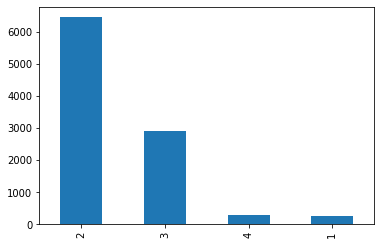

In [120]:
df.age_group.value_counts().plot(kind='bar');

In [121]:
fig = go.Figure(
    data = [
        go.Pie(
            labels = df.gender.value_counts().index, 
            values = df.gender.value_counts(), 
            textinfo='percent + label', 
            textposition='inside',
            marker=dict(line=dict(color='#000000', width=1)),
            hole = 0.5
        )
    ]
)
fig.update_layout(
    title_text="Gender ratio",
    annotations=[dict(text='Gender', x=0.5, y=0.5, font_size=20, showarrow=False)])
fig.show()

In [122]:
fig = go.Figure(
    data = [
        go.Pie(
            labels = df.nationality, 
            values = df.nationality.value_counts(),
            textinfo='percent', 
            textposition='inside',
            marker=dict(line=dict(color='#000000', width=1)), 
            hole = 0.5
        )
    ]
)
fig.update_layout(
    title_text="Successful people in different countries",
    annotations=[dict(text='nationality', x=0.5, y=0.5, font_size=20, showarrow=False)])
fig.show()

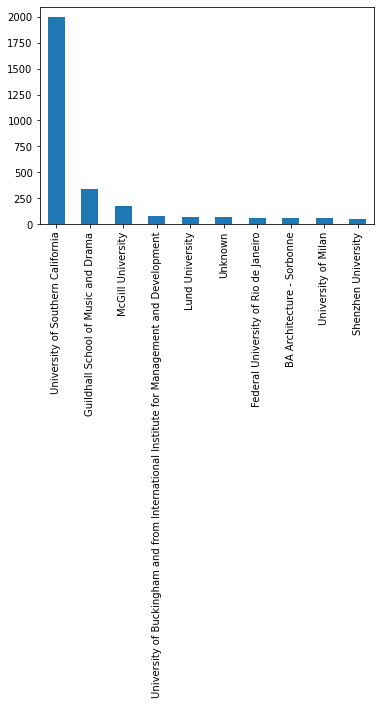

In [123]:
df.education.value_counts().head(10).plot(kind = 'bar');

In [124]:
fig = go.Figure(
    data = [
        go.Pie(
            labels = df.education.head(10).dropna(), 
            values = df.education.value_counts().head(10).dropna(), 
            textinfo='percent', 
            textposition='inside',
            marker=dict(line=dict(color='#000000', width=1)),
            hole = 0.5
        )
    ]
)
fig.update_layout(
    title_text="Successful people in top institutions",
    annotations=[dict(text='Institutions', x=0.5, y=0.5, font_size=20, showarrow=False)])
fig.show()

In [125]:
fig = go.Figure(
    data = [
        go.Pie(
            labels = df.marital_status.dropna().unique(), 
            values = df.marital_status.value_counts().dropna(), 
            textinfo='percent + label', 
            textposition='inside',
            marker=dict(line=dict(color='#000000', width=1)),
            hole = 0.5
        )
    ]
)
fig.update_layout(
    title_text="Relationship status : ",
    annotations=[dict(text='Relationship', x=0.5, y=0.5, font_size=20, showarrow=False)])
fig.show()

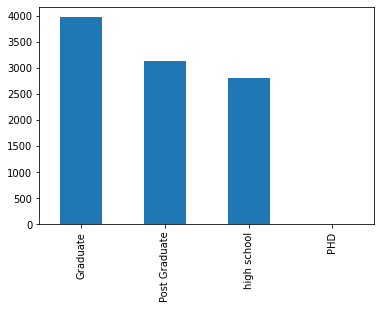

In [126]:
df.Degree.value_counts().plot(kind='bar');

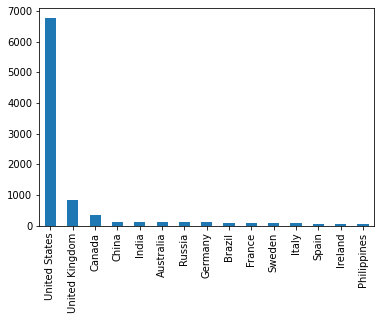

In [127]:
df.nationality.value_counts().head(15).plot(kind = 'bar');

In [128]:
fig = px.box( x = df.networth)
fig.show()

In [135]:
copy_df = df[(df.networth > 0) & (df.networth < 90000000)]

In [136]:
copy_df.shape[0]

7216

In [137]:
copy_df.dropna(subset=['education'], inplace= True)

In [138]:
fig = px.histogram( x = copy_df.networth)
fig.show()

In [142]:
from scipy import stats

fitted_data, fitted_lambda = stats.boxcox(copy_df.networth)

fig = px.histogram(fitted_data)
fig.show()

In [133]:
root = '../data/'
copy_df.to_csv(root + 'model_data.csv', encoding='utf-8', index= False)